✅ Dataset Loaded Successfully!

📊 Shape of Dataset:
Rows: 500, Columns: 19

🧾 Column Names:
['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Delinquent_Account', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure', 'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

📌 Data Types:
Customer_ID              object
Age                       int64
Income                  float64
Credit_Score            float64
Credit_Utilization      float64
Missed_Payments           int64
Delinquent_Account        int64
Loan_Balance            float64
Debt_to_Income_Ratio    float64
Employment_Status        object
Account_Tenure            int64
Credit_Card_Type         object
Location                 object
Month_1                  object
Month_2                  object
Month_3                  object
Month_4                  object
Month_5                  object
Month_6                  obj

C:\Users\mogal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


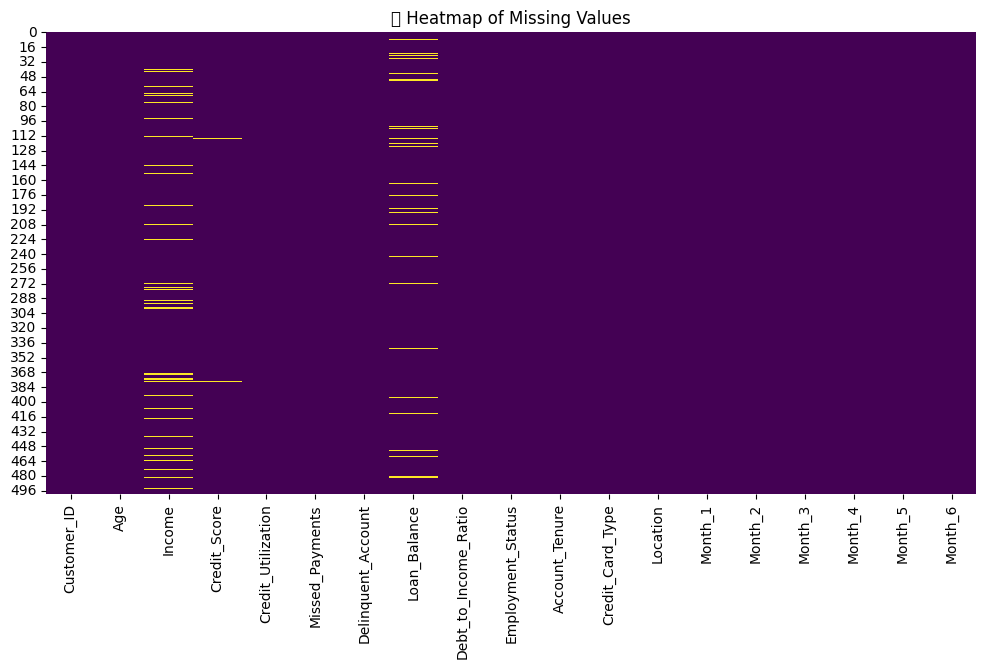

C:\Users\mogal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


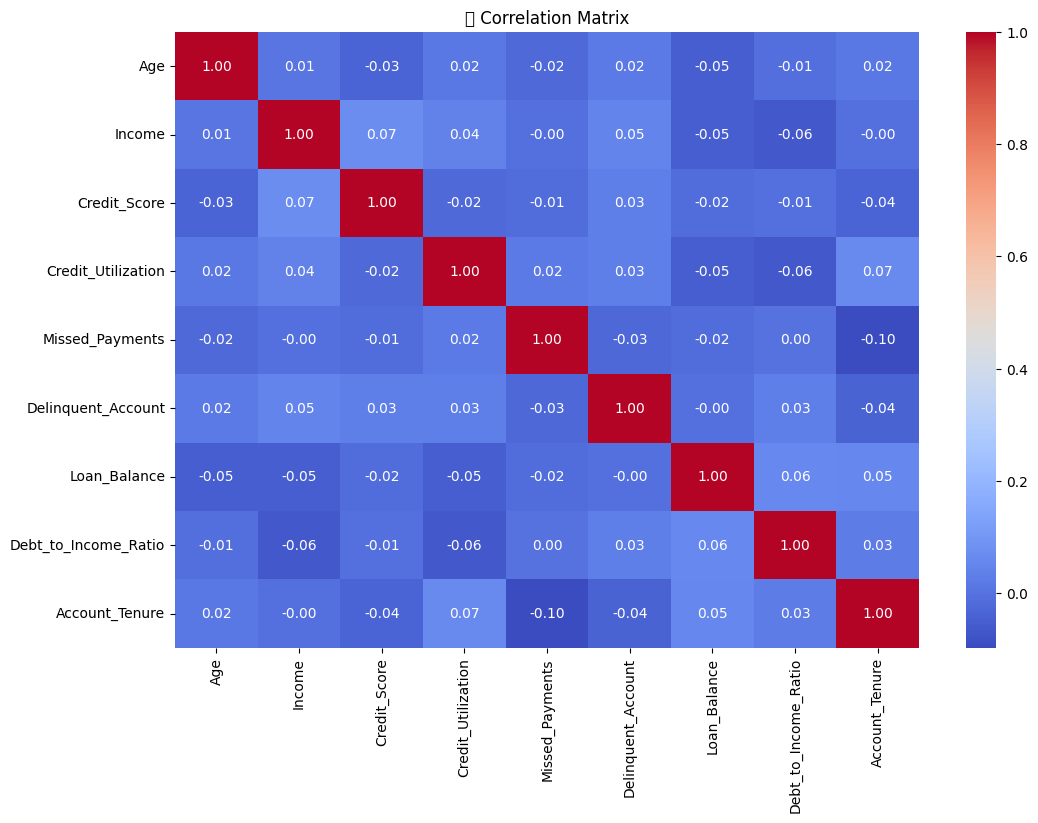

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Delinquency_prediction_dataset.csv')

# Step 2: Basic Info
print("✅ Dataset Loaded Successfully!\n")
print("📊 Shape of Dataset:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("🧾 Column Names:")
print(df.columns.tolist())

print("\n📌 Data Types:")
print(df.dtypes)

# Step 3: Missing Values Check
print("\n🔍 Missing Values Count:")
print(df.isnull().sum())

print("\n📉 Missing Values Percentage:")
missing_percent = df.isnull().mean() * 100
print(missing_percent)

# Step 4: Summary Statistics for Numerical Columns
print("\n📈 Summary Statistics (Numerical):")
print(df.describe())

# Step 5: Unique Value Counts for Categorical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("\n🔠 Unique Value Counts (Categorical Columns):")
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Step 6: Heatmap of Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("🔍 Heatmap of Missing Values")
plt.show()

# Step 7: Correlation Heatmap (Numerical Columns Only)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("📊 Correlation Matrix")
plt.show()


In [3]:
# Missing values count
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("🕳️ Columns with Missing Values:\n")
print(missing)

🕳️ Columns with Missing Values:

Income          39
Loan_Balance    29
Credit_Score     2
dtype: int64


Logistic Regression Accuracy: 0.8600
Decision Tree Accuracy: 0.6900
Neural Network Accuracy: 0.8600

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100


Confusion Matrix:
 [[86  0]
 [14  0]]


C:\Users\mogal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mogal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mogal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classificati

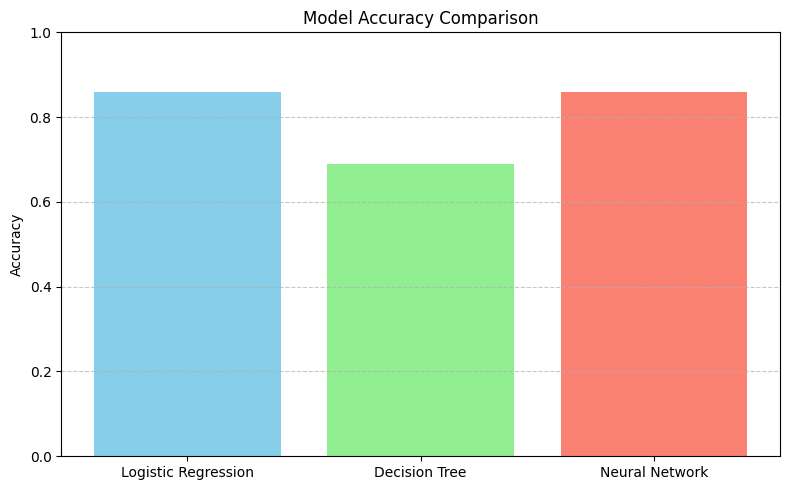

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Delinquency_prediction_dataset.csv")

features = ['Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Debt_to_Income_Ratio']
target = 'Delinquent_Account'

X = df[features]
y = df[target]

X = SimpleImputer(strategy='median').fit_transform(X)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
tree_model = DecisionTreeClassifier(random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

log_acc = accuracy_score(y_test, log_model.predict(X_test))
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))
nn_pred = nn_model.predict(X_test)
nn_acc = accuracy_score(y_test, nn_pred)

print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Decision Tree Accuracy: {tree_acc:.4f}")
print(f"Neural Network Accuracy: {nn_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, nn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nn_pred))

accuracies = {
    "Logistic Regression": log_acc,
    "Decision Tree": tree_acc,
    "Neural Network": nn_acc
}

plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
